## Harry Markowitz’s 1952 Modern Portfolio Theory (MPT), 
One of the most important ideas in modern finance.

## Assumptions

   Investors are rational → want **higher return.**

   Investors are **risk-averse** → for the same return, they pick the portfolio with lower risk.

   Therefore, the only portfolios worth considering are the ones that **maximize return for a given risk level** → these form the Efficient Frontier.

### This Was Revolutionary

Before Markowitz: People said "don’t put all eggs in one basket" but didn’t have math to prove it.

After Markowitz: He mathematically proved how diversification reduces risk and identified the efficient set of portfolios.

This work earned him the Nobel Prize in 1990 (shared with Sharpe and Miller).

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
# makes plots appear right below the code in Jupyter
import yfinance as yf
from pandas_datareader import data as wb

### Download Asset Data

P&G (Procter & Gamble) stock and the S&P 500 index

In [4]:
import yfinance as yf

assets = ["PG", "^GSPC"]  # P&G and S&P 500
data = yf.download(assets, start="2000-01-01")["Close"]

C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_28364\2670395670.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(assets, start="2000-01-01")["Close"]
[*********************100%***********************]  2 of 2 completed


In [5]:
data.head()

Ticker,PG,^GSPC
Date,,
2000-01-03,27.213184,1455.219971
2000-01-04,26.689566,1399.420044
2000-01-05,26.181786,1402.109985
2000-01-06,27.387743,1403.449951
2000-01-07,29.577488,1441.469971


In [6]:
data.tail()

Ticker,PG,^GSPC
Date,,
2025-08-25,156.149994,6439.319824
2025-08-26,155.970001,6465.939941
2025-08-27,156.960007,6481.399902
2025-08-28,155.649994,6501.859863
2025-08-29,157.039993,6460.259766


### Normalize to 100 (for easy comparison)

This shows how both assets grew over time, starting at the same base:

<Axes: xlabel='Date'>

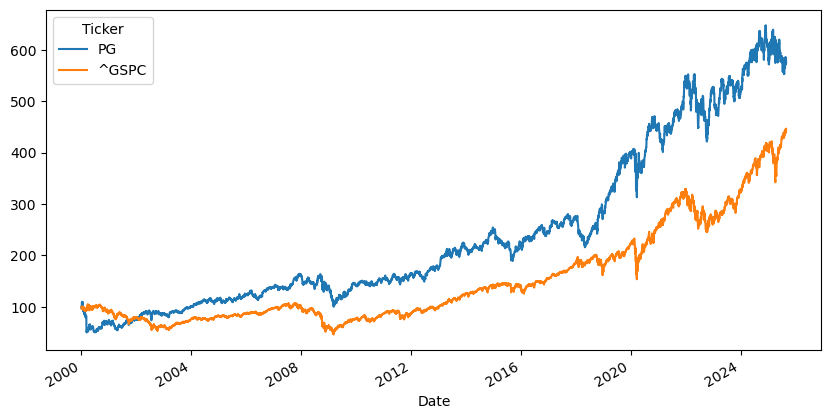

In [7]:
(data / data.iloc[0] * 100).plot(figsize=(10, 5))

### Compute Log Returns

We always use logarithmic returns (safer for compounding):

In [8]:
log_returns = np.log(data / data.shift(1))

**From here I calculated:**

Mean returns → average performance of each asset

Covariance matrix → how returns move together

Correlation matrix → similarity of movement

In [9]:
log_returns.mean()*250

Ticker
PG       0.067906
^GSPC    0.057745
dtype: float64

In [10]:
log_returns.cov()*250

Ticker,PG,^GSPC
Ticker,,
PG,0.044476,0.019052
^GSPC,0.019052,0.037621


In [11]:
log_returns.corr()

Ticker,PG,^GSPC
Ticker,,
PG,1.000000,0.465772
^GSPC,0.465772,1.000000


Correlation = 0.465772, > 30%

In [12]:
num_assets = len(assets)

In [13]:
num_assets

2

### Create Random Weights

Here’s the trick part you mentioned: generating random portfolio weights that always add to 1.

In [14]:
arr = np.random.random(2)
arr

array([0.82017944, 0.42081513])

In [15]:
arr[0] + arr[1]

1.2409945688003299

In [16]:
# divide each weight by the sum of all weights
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.08306633, 0.91693367])

In [17]:
weights[0] + weights[1]

1.0

**Core of Markowitz Mean-Variance Theory in Python —** simulating many possible portfolio combinations and then plotting them to visualize the Efficient Frontier.

## Expected Portfolio Return:

In [18]:
np.sum(weights * log_returns.mean()) * 250

0.0585890140919791

\\[
E(R_p) = \sum_{i=1}^{n} w_i \mu_i
\\]


\\[
E(R_p) = w_{\text{PG}} \mu_{\text{PG}} + w_{\text{S\&P}} \mu_{\text{S\&P}}
\\]


### Expected Portfolio Variance:

\\[
\sigma_p^2 = \mathbf{w}^T \mathbf{\Sigma} \mathbf{w}
\\]


\\[
\sigma_p^2 = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2w_1 w_2 \rho_{12} \sigma_1 \sigma_2
\\]


In [19]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.034839482048431444

### Expected Portfolio Volatility:

\\[
\sigma_p = \sqrt{\mathbf{w}^T \mathbf{\Sigma} \mathbf{w}}
\\]


In [20]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.1866533740612032

\\[
\sigma_p = \sqrt{w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2w_1 w_2 \rho_{12} \sigma_1 \sigma_2}
\\]


### Simulation Setup (Mean-Variance Combinations)

Generate 1000 random weights w1, w2 such that 

\\[
w_1 + w_2 = 1, \quad w_i \geq 0
\\]


For each portfolio:

    Compute expected return 𝐸(𝑅𝑝)E(Rp)

Compute volatility 𝜎𝑝
Append results into lists:

This build **1000 pairs [𝐸(𝑅𝑝), 𝜎𝑝 ]**

**The simulation does not mean 1000 different investments. Instead:**

It’s 1000 different combinations of weights in the same 2 assets.

In [21]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.06208387491354043,
  0.06128936288570501,
  0.06316355961217673,
  0.06143917323065639,
  0.06255695917375088,
  0.0674466946495236,
  0.05897404630794976,
  0.058528105280758316,
  0.061404358392703536,
  0.06789192348299425,
  0.06326176994910229,
  0.06207523736588863,
  0.0626034400761696,
  0.06023197016893078,
  0.06197164878035677,
  0.0639317123512211,
  0.06657823464099906,
  0.06781236825493725,
  0.06321057983624671,
  0.06370280438176729,
  0.06264330512700837,
  0.06679196199303036,
  0.06197506011151269,
  0.06396469498249173,
  0.059187597029315905,
  0.060018015729786364,
  0.05979179536934162,
  0.05919134325911288,
  0.06436454292800307,
  0.06332710591680135,
  0.06215964929312379,
  0.06227749639006558,
  0.06419855953398793,
  0.05866216443838415,
  0.06696632109774354,
  0.06731693684600583,
  0.06417844393986066,
  0.060625921960479376,
  0.06500669997092458,
  0.06452884779119675,
  0.06590766858714121,
  0.06188079235014404,
  0.06171453195889725,
  0.06114

weights = np.random.random(num_assets)

Generates a random number for each stock (between 0 and 1).

If we have 2 assets → we get something like [0.23, 0.77].

**weights /= np.sum(weights)**

**Normalizes the numbers so they add up to 1.**

Example: [0.23, 0.77] already sums to 1. But if you had [0.5, 0.8], dividing each by 1.3 gives [0.38, 0.62].

This makes sure weights represent percentages (like 38% stock A, 62% stock B).

pfolio_returns.append(...)

In [22]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.06435078, 0.06577451, 0.06162216, 0.06775914, 0.06480135,
        0.06441729, 0.06528834, 0.06371929, 0.06427077, 0.06288236,
        0.06202433, 0.06303058, 0.062976  , 0.05920784, 0.0653825 ,
        0.06588524, 0.06499797, 0.06000576, 0.06344375, 0.06349403,
        0.06383195, 0.05876923, 0.06213419, 0.05784166, 0.06123362,
        0.06600258, 0.06098605, 0.06218094, 0.06063255, 0.06421167,
        0.06293451, 0.0652549 , 0.06362   , 0.06447469, 0.0675017 ,
        0.06101553, 0.06021167, 0.06296818, 0.06585833, 0.06413899,
        0.06111645, 0.06334221, 0.06454508, 0.06346882, 0.05882385,
        0.06097725, 0.05846925, 0.06221079, 0.0610692 , 0.06608382,
        0.06063636, 0.06051235, 0.06434502, 0.06218527, 0.0588582 ,
        0.06238472, 0.06195137, 0.06320269, 0.06417653, 0.06541254,
        0.06404316, 0.06232576, 0.06378034, 0.0664805 , 0.06382191,
        0.06666455, 0.06303979, 0.06077016, 0.0646545 , 0.06299276,
        0.0622031 , 0.06207198, 0.0610884 , 0.06

**Converts Python lists → NumPy arrays.**

**Arrays are faster, easier to work with in math/plotting.**

In [23]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [24]:
portfolios.head()

,Return,Volatility
0,0.064351,0.179081
1,0.065775,0.189062
2,0.061622,0.172787
3,0.067759,0.209161
4,0.064801,0.181786


In [25]:
portfolios.tail()

,Return,Volatility
995,0.061219,0.173396
996,0.065955,0.190610
997,0.064088,0.177710
998,0.066357,0.194282
999,0.062477,0.172820


Text(0, 0.5, 'Expected Return')

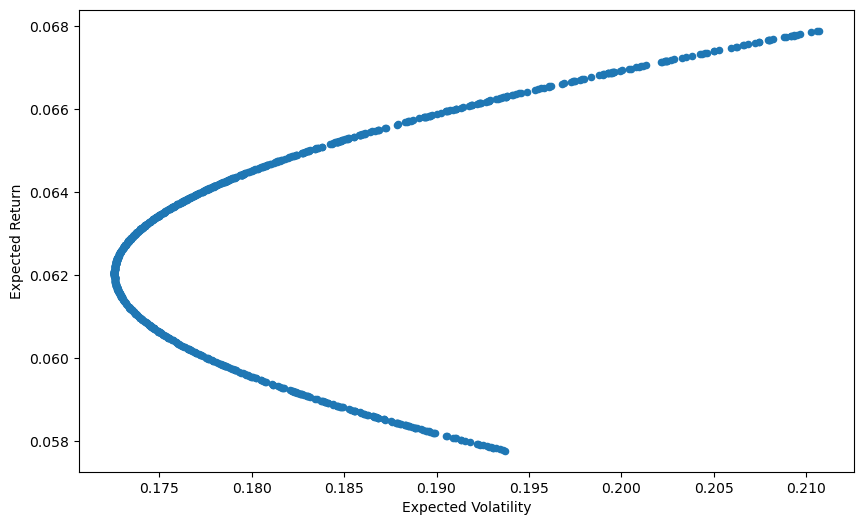

In [26]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [28]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm 

import matplotlib.pyplot as plt

data = pd.read_excel('Housing.xlsx')

## Multivariate Regression:

Independent Variables: *"House Size (sq.ft.)", "Number of Rooms", "Year of Construction"*

In [29]:
X = data[['House Size (sq.ft.)', 'Number of Rooms', 'Year of Construction']]
Y = data['House Price']

In [30]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.90
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           6.82e-05
Time:                        20:16:44   Log-Likelihood:                -258.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.452e+06    5.4e+06     -1.752      0.099   -2.09e+07    1.99e+06
House Size (sq.ft.)    341.8271    179.666      1.903      0.075     -39.049     722.703
Number of Rooms        1.16e+04   3.74e+04      0.310      0.760   -6.77e+04    9.08e+04
Year of Construction  4863.5761   2697.969      1.803      0.090    -855.862    1.06e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.747
Skew:                          -0.676   Prob(JB):                        0.418
Kurtosis:                       2.484   Cond. No.                     5.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Independent Variables: *"House Size (sq.ft.)", "Number of Rooms"*

In [31]:
X = data[['House Size (sq.ft.)', 'Number of Rooms']]
Y = data['House Price']

In [32]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     18.30
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           5.77e-05
Time:                        20:16:44   Log-Likelihood:                -260.28
No. Observations:                  20   AIC:                             526.6
Df Residuals:                      17   BIC:                             529.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.737e+05   1.03e+05      2.655      0.017    5.62e+04    4.91e+05
House Size (sq.ft.)   314.1363    190.485      1.649      0.117     -87.752     716.025
Number of Rooms      1.944e+04   3.95e+04      0.492      0.629   -6.39e+04    1.03e+05
==============================================================================
Omnibus:                        1.326   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.810
Skew:                          -0.487   Prob(JB):                        0.667
Kurtosis:                       2.853   Cond. No.                     5.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Independent Variables: *"House Size (sq.ft.)", "Year of Construction"*

In [33]:
X = data[['House Size (sq.ft.)', 'Year of Construction']]
Y = data['House Price']

In [34]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     23.55
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           1.26e-05
Time:                        20:16:44   Log-Likelihood:                -258.49
No. Observations:                  20   AIC:                             523.0
Df Residuals:                      17   BIC:                             526.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.654e+06   5.21e+06     -1.852      0.081   -2.07e+07    1.34e+06
House Size (sq.ft.)    394.0417     61.098      6.449      0.000     265.137     522.947
Year of Construction  4960.9407   2607.443      1.903      0.074    -540.283    1.05e+04
==============================================================================
Omnibus:                        2.064   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.689
Skew:                          -0.663   Prob(JB):                        0.430
Kurtosis:                       2.480   Cond. No.                     5.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Independent Variables: *"Number of Rooms", "Year of Construction"*

In [35]:
X = data[['Number of Rooms', 'Year of Construction']]
Y = data['House Price']

In [36]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     17.79
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           6.79e-05
Time:                        20:16:44   Log-Likelihood:                -260.47
No. Observations:                  20   AIC:                             526.9
Df Residuals:                      17   BIC:                             529.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.471e+06   5.77e+06     -1.468      0.160   -2.06e+07     3.7e+06
Number of Rooms       7.824e+04    1.4e+04      5.574      0.000    4.86e+04    1.08e+05
Year of Construction  4424.7160   2887.793      1.532      0.144   -1667.996    1.05e+04
==============================================================================
Omnibus:                        2.115   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.400
Skew:                          -0.407   Prob(JB):                        0.497
Kurtosis:                       1.991   Cond. No.                     4.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""